# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create an empty list to hold the weather data.
city_data = []

# Define an empty list to fetch the weather data for each city
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
counter = 0

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_list.append(city_weather['name'])
        lat_list.append(city_weather['coord']['lat'])
        lng_list.append(city_weather['coord']['lon'])
        max_temp_list.append(city_weather['main']['temp_max'])
        humidity_list.append(city_weather['main']['humidity'])
        cloudiness_list.append(city_weather['clouds']['all'])
        windspeed_list.append(city_weather['wind']['speed'])
        date_list.append(city_weather['dt'])
        country_list.append(city_weather['sys']['country'])


             # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # city_lat = city_weather["coord"]["lat"]
        # city_lng = city_weather["coord"]["lon"]
        # city_max_temp = city_weather["main"]["temp_max"]
        # city_humidity = city_weather["main"]["humidity"]
        # city_clouds = city_weather["clouds"]["all"]
        # city_wind = city_weather["wind"]["speed"]
        # city_country = city_weather["sys"]["country"]
        # city_date = city_weather["dt"]

    
        # Append the City information into city_data list
        city_data.append({"City": city_list, 
                          "Lat": lat_list, 
                          "Lng": lng_list, 
                          "Max Temp": max_temp_list,
                          "Humidity": humidity_list,
                          "Cloudiness": cloudiness_list,
                          "Wind Speed": windspeed_list,
                          "Country": country_list,
                          "Date": date_list})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kutum
Processing Record 2 of Set 1 | nogliki
Processing Record 3 of Set 1 | colonia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | brookings
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | darab
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | chibougamau
Processing Record 14 of Set 1 | koryazhma
Processing Record 15 of Set 1 | aflou
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | yaren
Processing Record 21 of Set 1 | eastham
Processing Record 22 of Set 1 | kalmunai
Processing Record 23 of Set 1 | puerto na

In [4]:
print(len(country_list))

551


In [5]:
# Convert the cities weather data into a Pandas DataFrame
weather_df = {
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list}

# Create a DataFrame
weather_dict = pd.DataFrame(weather_df)
weather_dict 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kutum,14.2000,24.6667,12.56,23,6,4.08,SD,1707100049
1,Nogliki,51.8333,143.1667,-14.81,77,3,4.02,RU,1707099861
2,Cologne,50.9333,6.9500,12.12,81,100,9.77,DE,1707099851
3,Punta Arenas,-53.1500,-70.9167,21.06,40,75,11.32,CL,1707099733
4,Brookings,44.3114,-96.7984,1.00,95,100,3.09,US,1707099759
...,...,...,...,...,...,...,...,...,...
546,El Granada,37.5027,-122.4694,13.88,87,100,9.26,US,1707100126
547,Babīna,25.2500,78.4667,15.27,93,51,1.79,IN,1707100126
548,Pyhäselkä,62.4333,29.9667,-3.67,97,98,0.88,FI,1707100126
549,Okha,53.5739,142.9478,-19.47,90,21,6.78,RU,1707100126


In [6]:
# Show Record Count
weather_dict.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Export the City_Data into a csv
weather_dict.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kutum,14.2000,24.6667,12.56,23,6,4.08,SD,1707100049
1,Nogliki,51.8333,143.1667,-14.81,77,3,4.02,RU,1707099861
2,Cologne,50.9333,6.9500,12.12,81,100,9.77,DE,1707099851
3,Punta Arenas,-53.1500,-70.9167,21.06,40,75,11.32,CL,1707099733
4,Brookings,44.3114,-96.7984,1.00,95,100,3.09,US,1707099759


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

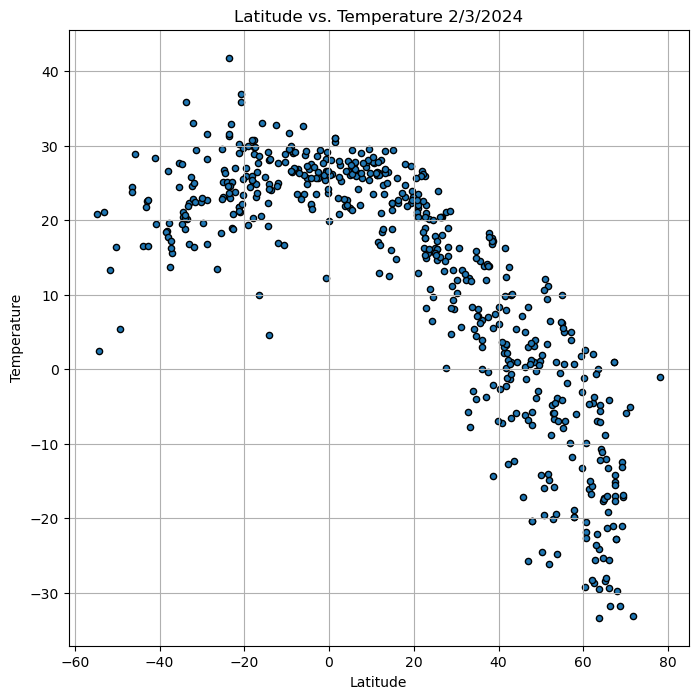

In [9]:
# Build scatter plot for latitude vs. temperature
weather_dict.plot(kind = 'scatter', x=["Lat"], y=["Max Temp"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature 2/3/2024")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

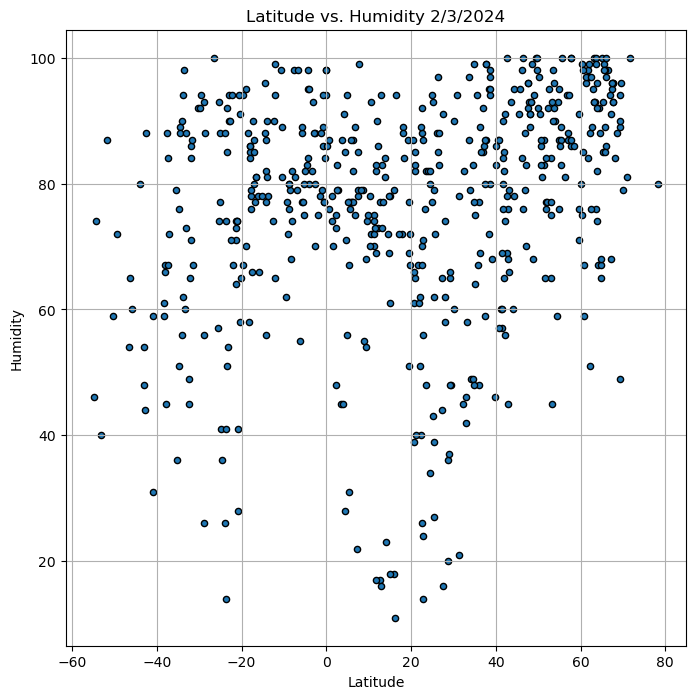

In [10]:
# Build the scatter plots for latitude vs. humidity
weather_dict.plot(kind = 'scatter', x=["Lat"], y=["Humidity"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity 2/3/2024")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

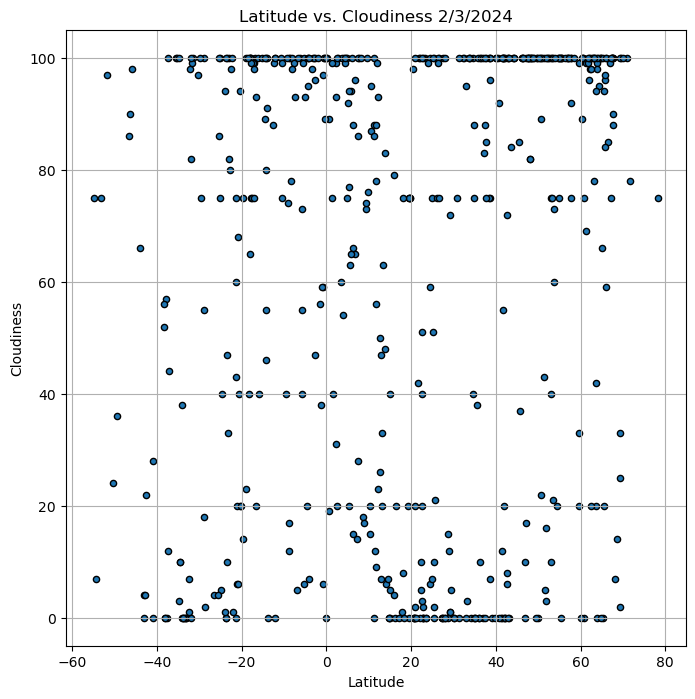

In [11]:
# Build the scatter plots for latitude vs. cloudiness
weather_dict.plot(kind = 'scatter', x=["Lat"], y=["Cloudiness"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness 2/3/2024")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

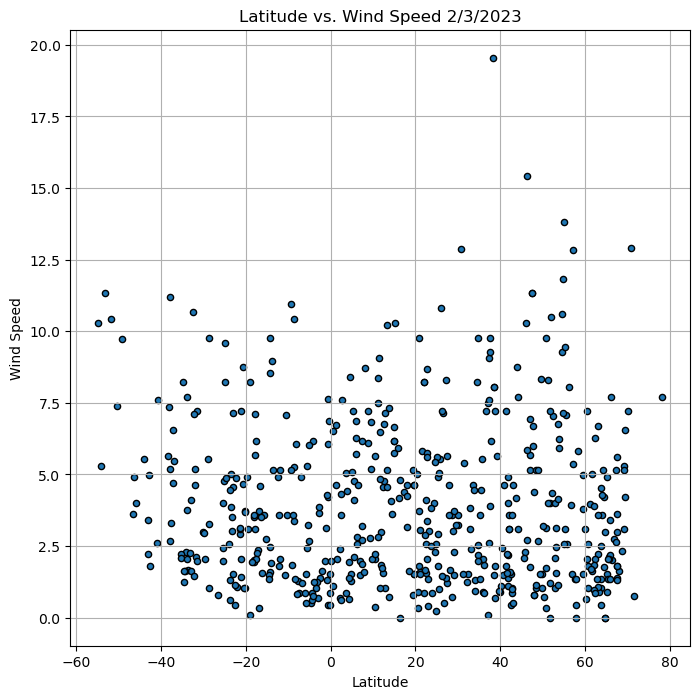

In [12]:
# Build the scatter plots for latitude vs. wind speed
weather_dict.plot(kind = 'scatter', x=["Lat"], y=["Wind Speed"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed 2/3/2023")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, xlabel='X-axis', ylabel='Y-axis', title='Linear Regression Plot'):
    
    # Reshape the data for scikit-learn if it's a single feature
    x = np.array(x).reshape(-1, 1)

    # Create a linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Plot the data points
    plt.figure(figsize=(8, 6))
    plt.scatterplot(x=x.flatten(), y=y, color='blue', label='Data Points')

    # Plot the regression line
    plt.annotate(x=x.flatten(), y=model.predict(x), color='red', label='Linear Regression Line')

    # Customize plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Show the plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_dict[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kutum,14.2000,24.6667,12.56,23,6,4.08,SD,1707100049
1,Nogliki,51.8333,143.1667,-14.81,77,3,4.02,RU,1707099861
2,Cologne,50.9333,6.9500,12.12,81,100,9.77,DE,1707099851
4,Brookings,44.3114,-96.7984,1.00,95,100,3.09,US,1707099759
6,Dārāb,28.7519,54.5444,4.76,36,15,0.73,IR,1707099868


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_dict[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Punta Arenas,-53.1500,-70.9167,21.06,40,75,11.32,CL,1707099733
5,Port-aux-Français,-49.3500,70.2167,5.44,72,36,9.72,TF,1707099818
9,Waitangi,-43.9535,-176.5597,16.60,80,66,5.54,NZ,1707099818
11,Mount Gambier,-37.8333,140.7667,19.67,45,57,5.20,AU,1707099823
17,Bredasdorp,-34.5322,20.0403,21.04,89,10,1.24,ZA,1707099831


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8839761735611371.


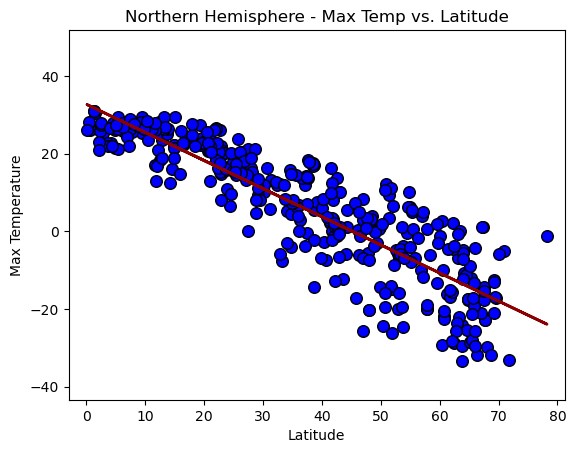

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(0, -300), fontsize=10, color='darkred')


# Set the limits of the y axis:
plt.ylim(min(weather_dict['Max Temp'])-10, max(weather_dict['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_dict['Lat'])+3)

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

**Discussion about the linear relationship:** This graph shows a negative regression between latitude and Max Temperautre. With the r value being a negative value, this shows a negative correlation bewteen what is being plotted. The further north the cities are located, the max temperature will rise.

The r-value is: 0.374209801690556.


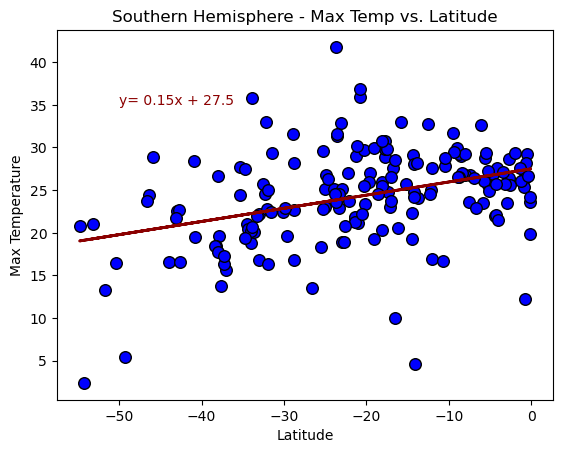

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
t_values = southern_hemi_df['Lat']
v_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(t_values, v_values)

regress_values = t_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(-50, 35),fontsize=10, color='darkred')

# Create plot:
plt.scatter(t_values, v_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(t_values,regress_values, 'darkred', linewidth=2)

# print rvalue
print(f"The r-value is: {rvalue}.")


# Show plot:
plt.show()

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

**Discussion about the linear relationship:** The Southern scatter plot show a positive correlation. This shows when the latitude decreases, the temperature rise. Both graphs shows that the r value is postitve whech show that the correlation is postive, also.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3902146817380271.


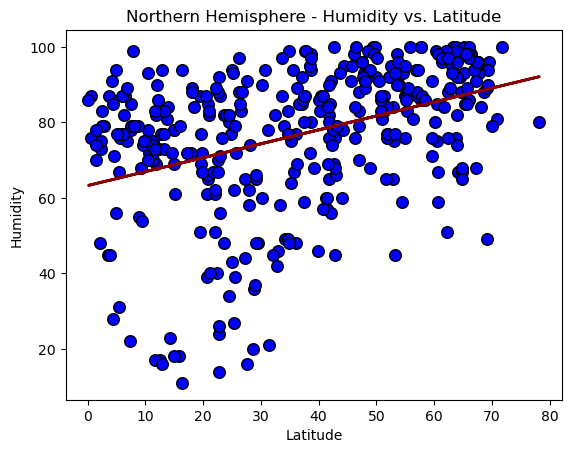

<Figure size 640x480 with 0 Axes>

In [18]:
# Northern Hemisphere
a_values = northern_hemi_df['Lat']
b_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, b_values)

regress_values = a_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(51,6), fontsize=10, color='darkred')

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(a_values,b_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(a_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()

plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")

The r-value is: 0.39231806302822386.


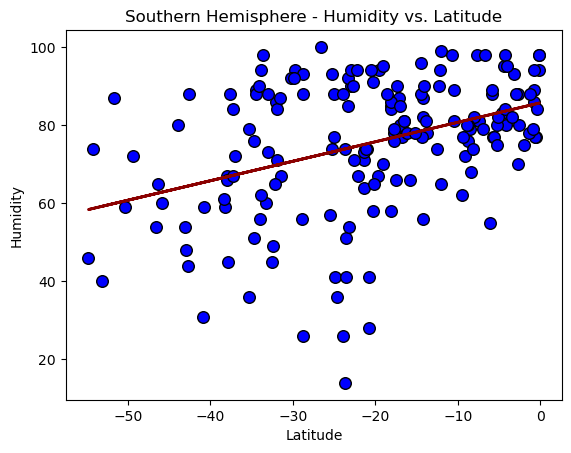

In [19]:
# Southern Hemisphere
a_values = southern_hemi_df['Lat']
b_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(a_values, b_values)

regress_values = a_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(51,6), fontsize=10, color='darkred')


# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(a_values,b_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(a_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()



**Discussion about the linear relationship:** There is no correlation between latitude and humidity. Both graphs show the cities spread out sporadically.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22435461220292166.


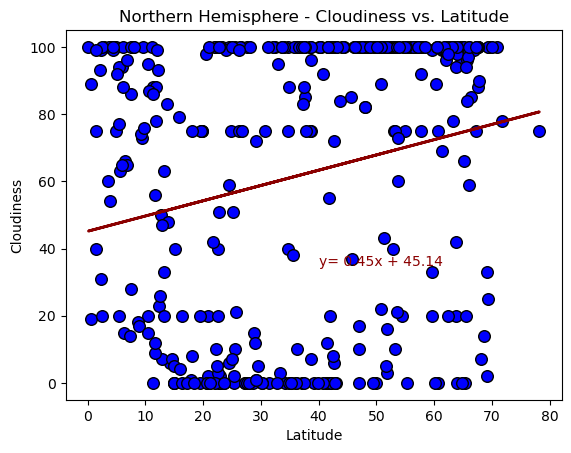

<Figure size 640x480 with 0 Axes>

In [20]:
# Northern Hemisphere
c_values = northern_hemi_df['Lat']
d_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_values, d_values)

regress_values = c_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(40, 35), fontsize=10, color='darkred')

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(c_values,d_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(c_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()

plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude.png")

The r-value is: 0.31355265968909746.


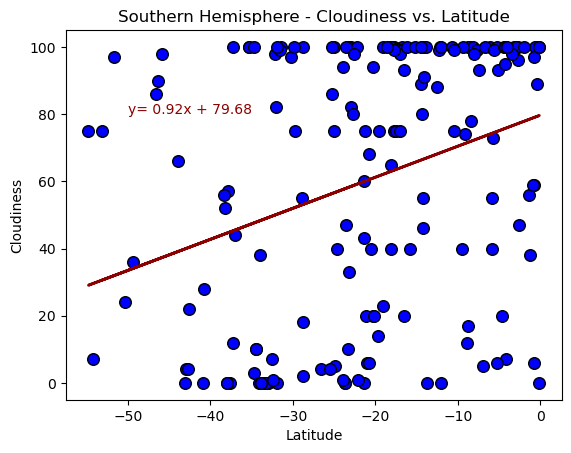

<Figure size 640x480 with 0 Axes>

In [21]:
# Southern Hemisphere
e_values = southern_hemi_df['Lat']
f_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(e_values, f_values)

regress_values = e_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(-50, 80), fontsize=10, color='darkred')

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(e_values,f_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(e_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()

plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude.png")

**Discussion about the linear relationship:** There is no correlaton between latitude and cloudiness. All cities are spread out throughout both graph.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03424174939474846.


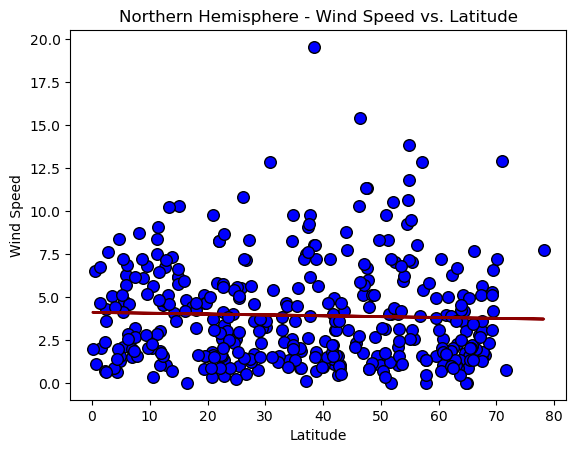

<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere
p_values = northern_hemi_df['Lat']
q_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(p_values, q_values)

regress_values = p_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(40, 35), fontsize=10, color='darkred')

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(p_values,q_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(p_values,regress_values,'darkred', linewidth=2)


# Show plot:
plt.show()

plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude.png")

The r-value is: -0.3091494696329268.


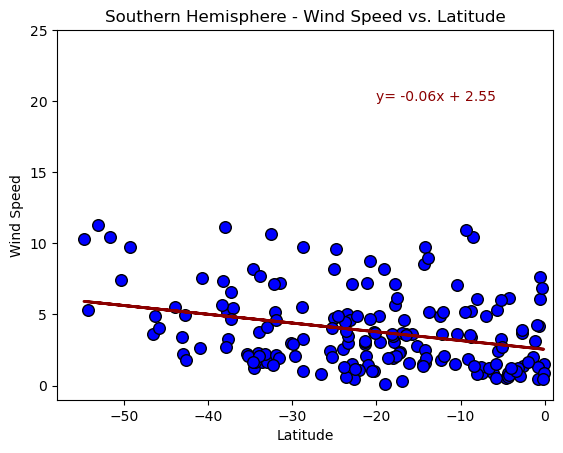

<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere
p_values = southern_hemi_df['Lat']
q_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(p_values, q_values)

regress_values = p_values * slope + intercept

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed', color='black')
plt.xlabel('Latitude', color='black')
plt.annotate(line_eq,(-20, 20), fontsize=10, color='darkred')

# print rvalue
print(f"The r-value is: {rvalue}.")

# Create plot:
plt.scatter(p_values,q_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(p_values,regress_values,'darkred', linewidth=2)


# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Show plot:
plt.show()

plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude.png")

**Discussion about the linear relationship:** There is a slight negative corelation between latitude and wind speed. Both graph show a slight relationship between what is being graphed.